In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [10]:
ground_cricket_data = {"ChirpsSecond": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "GroundTemperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

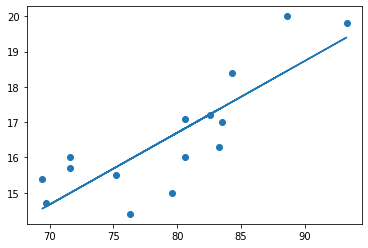




R2 Score:  0.6922946529146998
Extrapolated Value:  [[19.74428913]]
Interpolated Value:  [[84.2347963]]


In [11]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

Y_vals= df.ChirpsSecond.values.reshape(-1,1)
X_vals= df.GroundTemperature.values.reshape(-1,1)

model=LinearRegression()

reg_mod=model.fit(X=X_vals,y=Y_vals)
intercept=reg_mod.intercept_
coeff=reg_mod.coef_

plt.scatter(df['GroundTemperature'],df['ChirpsSecond'])

line=df.GroundTemperature.apply(lambda x: coeff*x + intercept)
plt.plot(df.GroundTemperature,line)

plt.show()

print("\n\n")

print("R2 Score: ",model.score(X_vals,Y_vals))

print("Extrapolated Value: ",model.predict([[95]]))

model.fit(X=Y_vals,y=X_vals)
print("Interpolated Value: ",model.predict([[18]]))

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [17]:
from google.colab import drive
drive.mount('/content/drive/')
df2=pd.read_fwf('/content/drive/My Drive/brain_body.txt')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


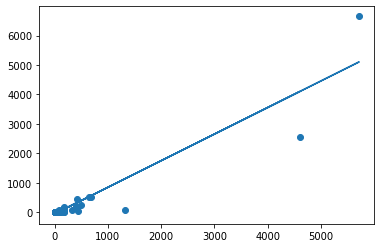




R2 Score:  0.8726620843043331


In [18]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

Y_vals= df2.Brain.values.reshape(-1,1)
X_vals= df2.Body.values.reshape(-1,1)

model=LinearRegression()

reg_mod=model.fit(X=X_vals,y=Y_vals)
intercept=reg_mod.intercept_
coeff=reg_mod.coef_

plt.scatter(df2['Body'],df2['Brain'])

line=df2.Body.apply(lambda x: coeff*x + intercept)
plt.plot(df2.Body,line)

plt.show()

print("\n\n")

print("R2 Score: ",model.score(X_vals,Y_vals))

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [24]:
from google.colab import drive
drive.mount('/content/drive/')
df3=pd.read_fwf('/content/drive/My Drive/salary.txt',header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df3.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df3['Year']=scaler.fit_transform(df3['Year'].to_numpy().reshape(-1,1))
df3['YSdeg']=scaler.fit_transform(df3['YSdeg'].to_numpy().reshape(-1,1))

In [26]:
encod=pd.get_dummies(df3.Rank,prefix='Rank')
df3 = pd.concat([df3,encod.iloc[:,1:]],axis=1)
df3.drop(columns=['Rank'],axis=1,inplace=True)

In [27]:
X_vals= df3.drop(columns=['Salary','Degree'],axis=1).values.reshape(-1,5)
Y_vals= df3.Salary.values.reshape(-1,1)

df3.corr()

,Sex,Year,Degree,YSdeg,Salary,Rank_2,Rank_3
Sex,1.000000,-0.379404,0.077112,-0.088288,-0.252782,-0.172932,-0.123392
Year,-0.379404,1.000000,-0.143377,0.638776,0.700669,-0.029655,0.459360
Degree,0.077112,-0.143377,1.000000,-0.482836,-0.069726,-0.378549,0.159784
YSdeg,-0.088288,0.638776,-0.482836,1.000000,0.674854,0.168670,0.533728
Salary,-0.252782,0.700669,-0.069726,0.674854,1.000000,-0.064397,0.790729
Rank_2,-0.172932,-0.029655,-0.378549,0.168670,-0.064397,1.000000,-0.479857
Rank_3,-0.123392,0.459360,0.159784,0.533728,0.790729,-0.479857,1.000000


In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
Vif = [variance_inflation_factor(X_vals,i) for i in range(5)]
Vif

[1.3700521662449878,
 2.106075624161948,
 1.9067508766688606,
 1.0685008486542547,
 1.4496914097648694]

VIF is least when 'Sex','Year','YSdeg','Rank_2','Rank3' are considered to avoid multi collinearity



In [30]:
model=LinearRegression()

reg_mod=model.fit(X=X_vals,y=Y_vals)

print("R2 Score with 'Sex': ",model.score(X_vals,Y_vals))

X_vals= df3.drop(columns=['Salary','Degree','Sex'],axis=1).values.reshape(-1,4)

print("R2 Score without 'Sex': ",model.score(X_vals,Y_vals))

R2 Score with 'Sex':  0.8461814822252524
R2 Score without 'Sex':  0.8461814822252524


'Sex' column doesn't make any difference in the R2 score